In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ast

# Helper function to convert string tuples in the CSV to numpy arrays
def convert_to_array(s):
    try:
        # Using ast.literal_eval to safely evaluate the string as a Python literal
        return np.array(ast.literal_eval(s))
    except ValueError as e:
        print(f"ValueError: {e} for string: {s}")
        return np.nan

# Read data
db = pd.read_csv('output_data.csv', header=0)

# Iterate over the columns and apply the conversion function to each element
tuple_columns = [
    'position_action', 'angle_action', 'gripper_position', 'gripper_angle',
    'gripper_velocity', 'target_position', 'target_angle', 'target_velocity'
]
for col in tuple_columns:
    db[[f"{col}_x", f"{col}_y", f"{col}_z"]] = db[col].apply(lambda s: pd.Series(convert_to_array(s), index=[f"{col}_x", f"{col}_y", f"{col}_z"]))

# Now that the data is processed, you can plot the different metrics

# Position Action Plot
plt.figure(figsize=(8,6))
plt.plot(db["position_action_x"], color='r')
plt.plot(db["position_action_y"], color='g')
plt.plot(db["position_action_z"], color='b')
plt.title('Position Action')
plt.ylabel('Position (unit)')
plt.xlabel('timestep')
plt.legend(['x', 'y', 'z'])
plt.show()

# Angle Action Plot
plt.figure(figsize=(8,6))
plt.plot(db["angle_action_x"], color='r')
plt.plot(db["angle_action_y"], color='g')
plt.plot(db["angle_action_z"], color='b')
plt.title('Angle Action')
plt.ylabel('Angle (radians)')
plt.xlabel('timestep')
plt.legend(['roll', 'pitch', 'yaw'])
plt.show()

# Gripper vs Target Position Plot
plt.figure(figsize=(8,6))
plt.plot(db["gripper_position_x"], color='r')
plt.plot(db["gripper_position_y"], color='g')
plt.plot(db["gripper_position_z"], color='b')
plt.plot(db["target_position_x"], linestyle='--', color='r')
plt.plot(db["target_position_y"], linestyle='--', color='g')
plt.plot(db["target_position_z"], linestyle='--', color='b')
plt.title('Gripper vs Target Position')
plt.ylabel('Position (unit)')
plt.xlabel('timestep')
plt.legend(['Gripper x', 'Gripper y', 'Gripper z', 'Target x', 'Target y', 'Target z'])
plt.show()

# Gripper vs Target Angle Plot
plt.figure(figsize=(8,6))
plt.plot(db["gripper_angle_x"], color='r')
plt.plot(db["gripper_angle_y"], color='g')
plt.plot(db["gripper_angle_z"], color='b')
plt.plot(db["target_angle_x"], linestyle='--', color='r')
plt.plot(db["target_angle_y"], linestyle='--', color='g')
plt.plot(db["target_angle_z"], linestyle='--', color='b')
plt.title('Gripper vs Target Angle')
plt.ylabel('Angle (radians)')
plt.xlabel('timestep')
plt.legend(['Gripper roll', 'Gripper pitch', 'Gripper yaw', 'Target roll', 'Target pitch', 'Target yaw'])
plt.show()

# Gripper vs Target Velocity Plot
plt.figure(figsize=(8,6))
plt.plot(db["gripper_velocity_x"], color='r')
plt.plot(db["gripper_velocity_y"], color='g')
plt.plot(db["gripper_velocity_z"], color='b')
plt.plot(db["target_velocity_x"], linestyle='--', color='r')
plt.plot(db["target_velocity_y"], linestyle='--', color='g')
plt.plot(db["target_velocity_z"], linestyle='--', color='b')
plt.title('Gripper vs Target Velocity')
plt.ylabel('Velocity (unit/s)')
plt.xlabel('timestep')
plt.legend(['Gripper vx', 'Gripper vy', 'Gripper vz', 'Target vx', 'Target vy', 'Target vz'])
plt.show()

# Closest Point Plot
plt.figure(figsize=(8,6))
plt.plot(db["closest_point"])
plt.title('Closest Distance')
plt.ylabel('Distance (unit)')
plt.xlabel('timestep')
plt.show()

# Contact Force Plot
plt.figure(figsize=(8,6))
plt.plot(db["contact_force"])
plt.title('Contact Force')
plt.ylabel('Force (N)')
plt.xlabel('timestep')
plt.show()

# Rewards Plot
plt.figure(figsize=(8,6))
plt.plot(db["rewards"])
plt.title('Rewards')
plt.ylabel('Reward Value')
plt.xlabel('timestep')
plt.show()

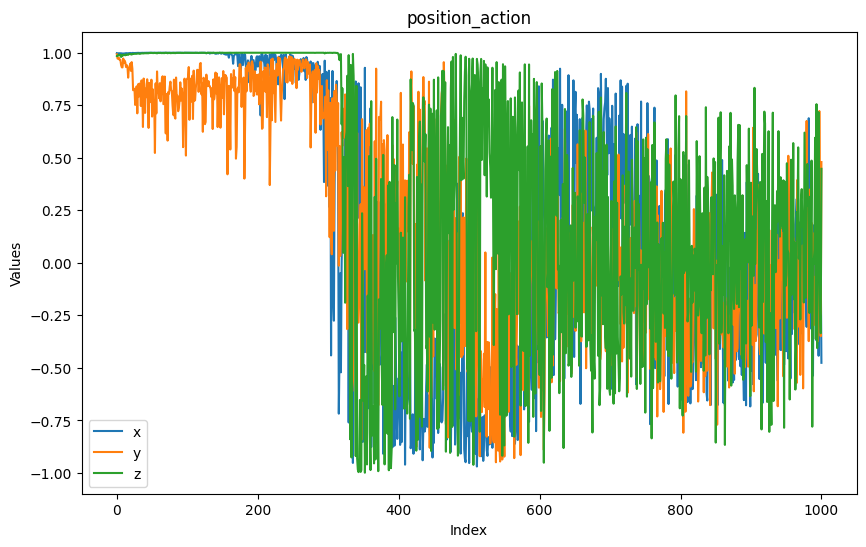

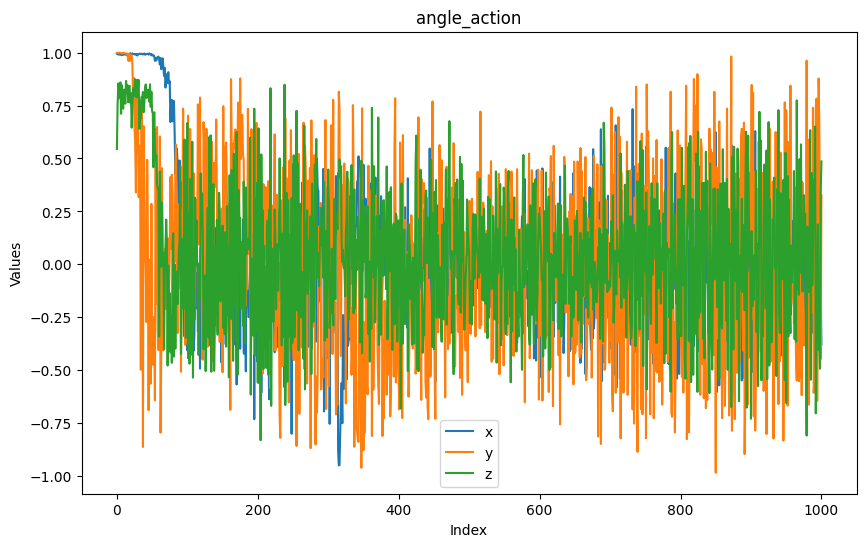

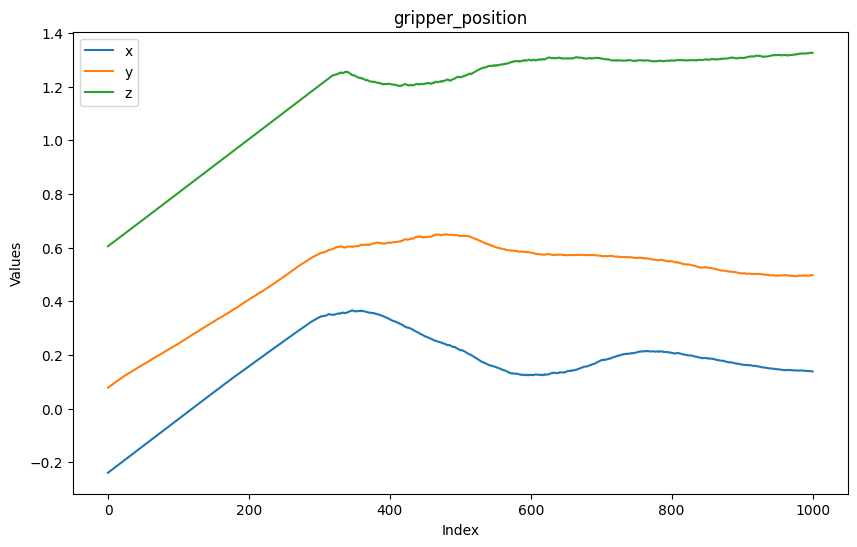

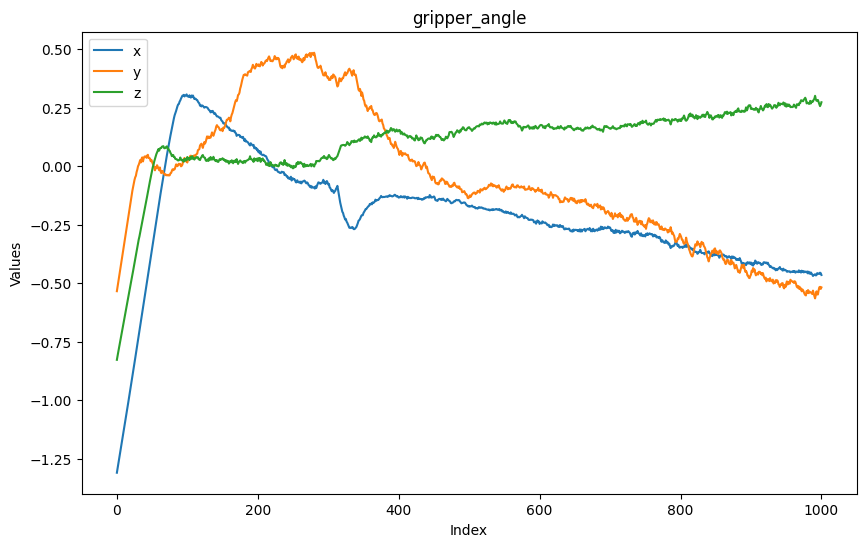

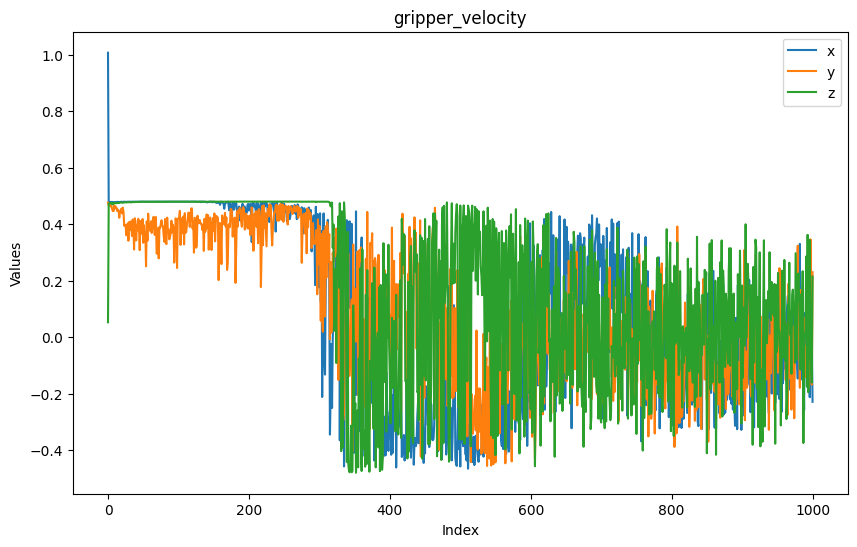

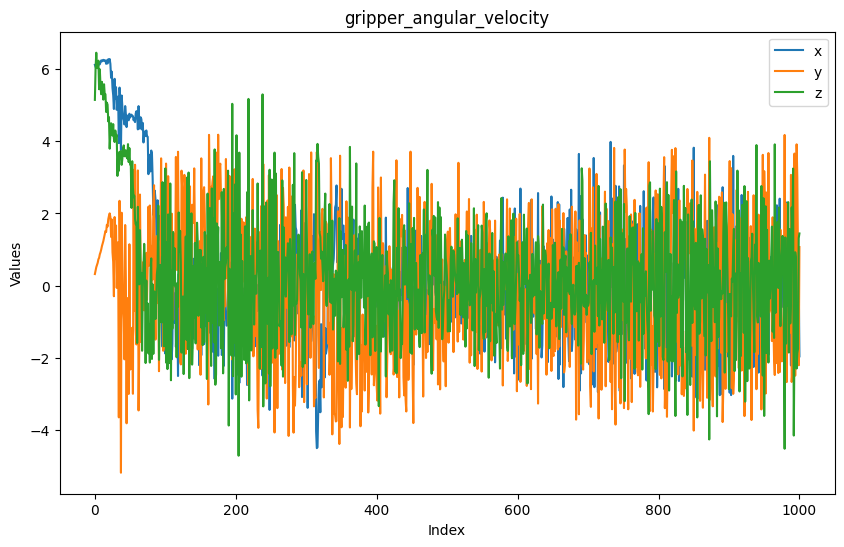

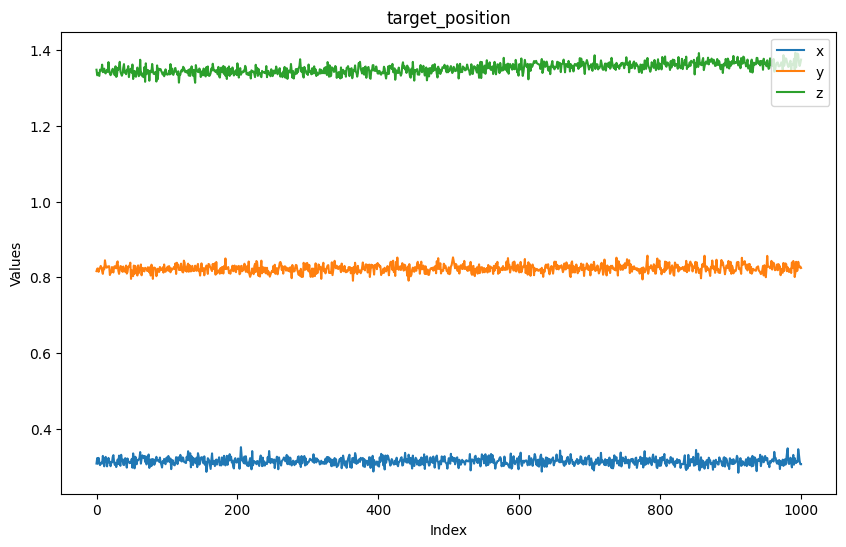

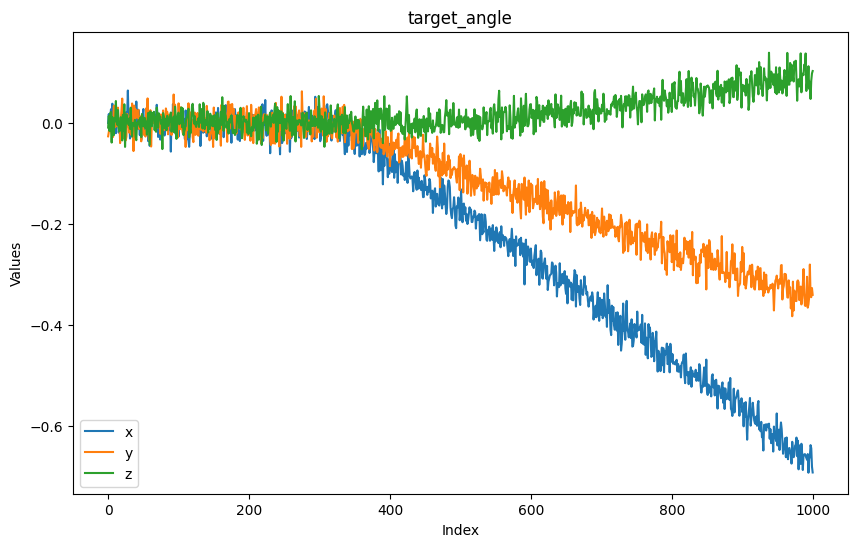

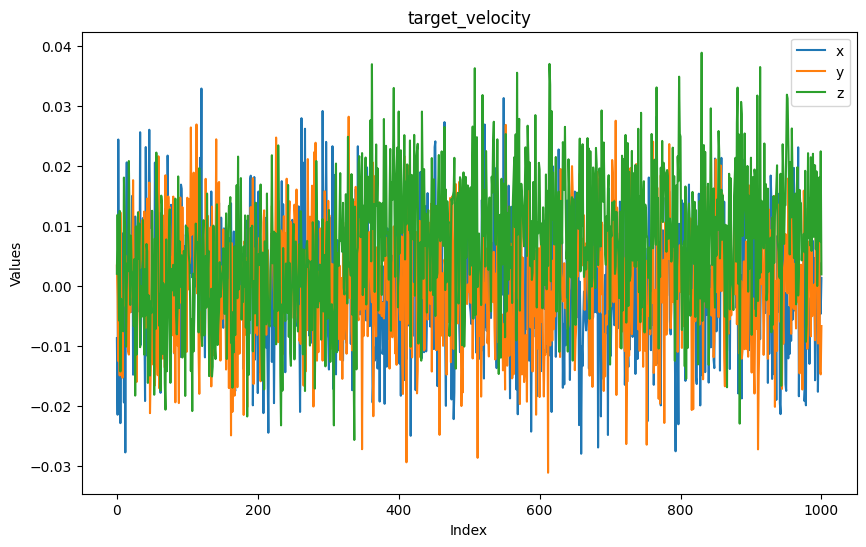

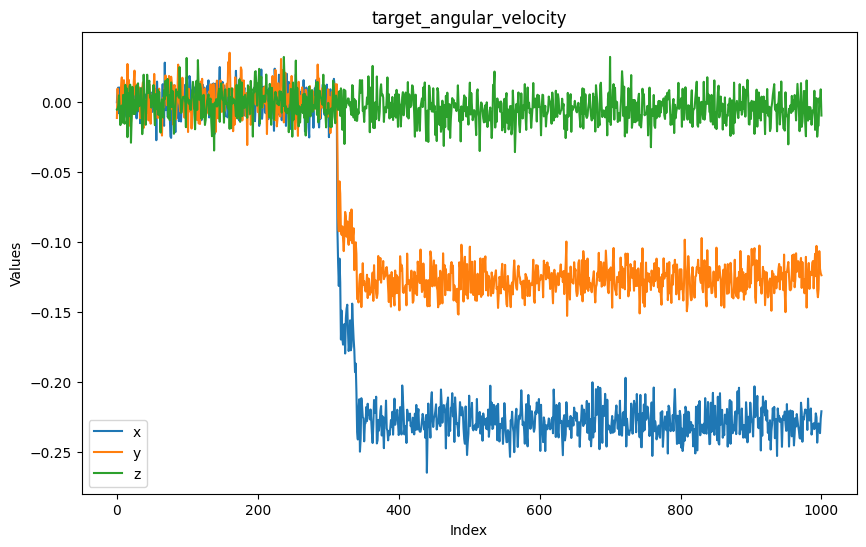

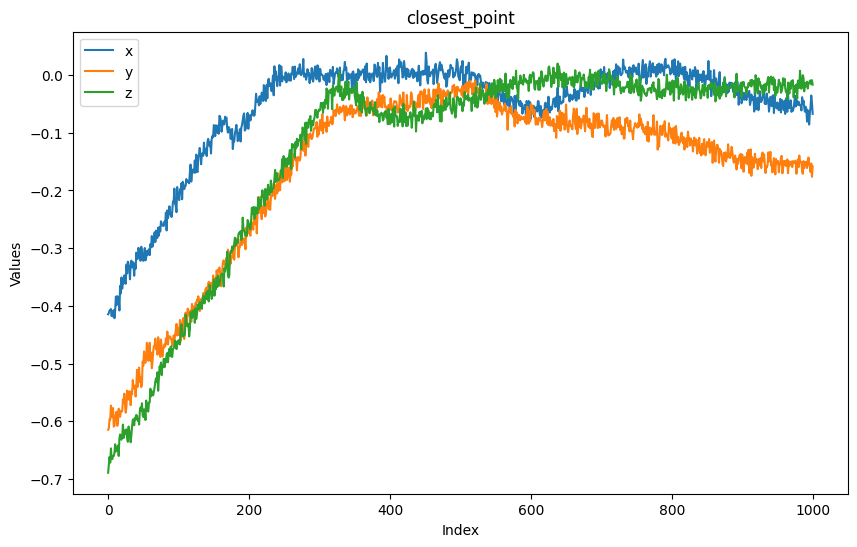

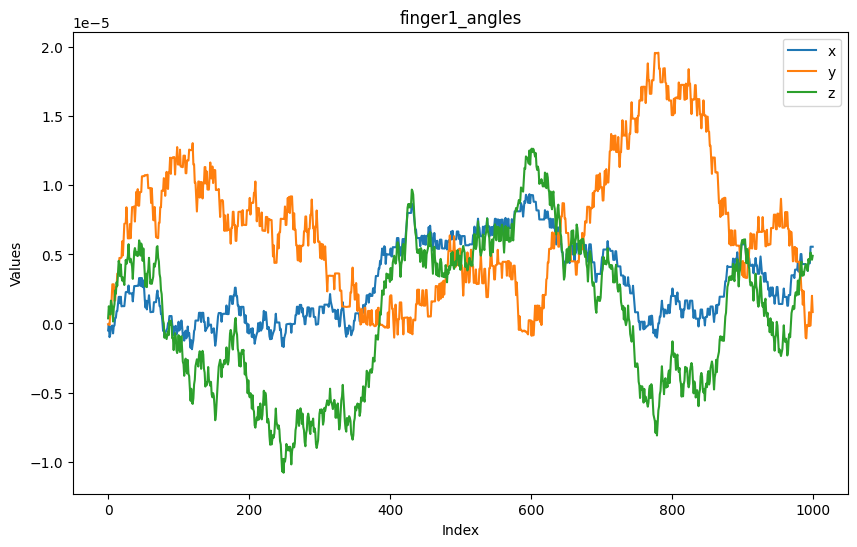

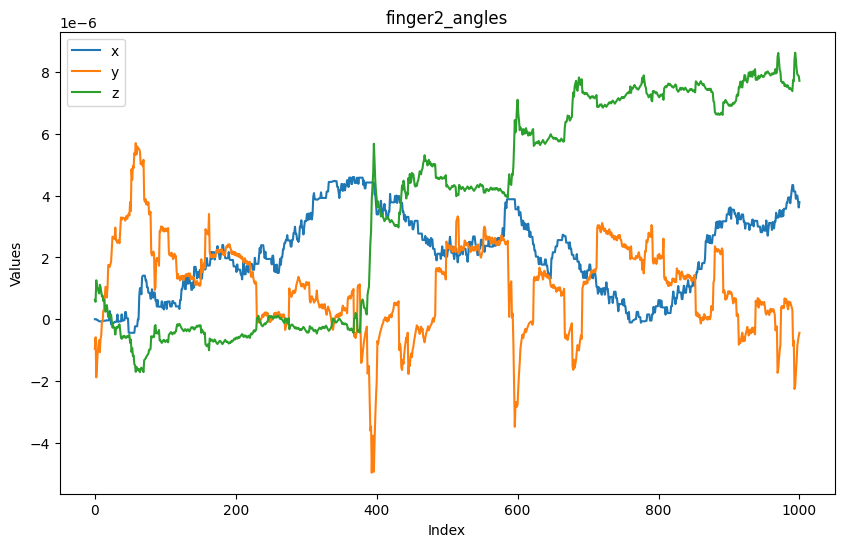

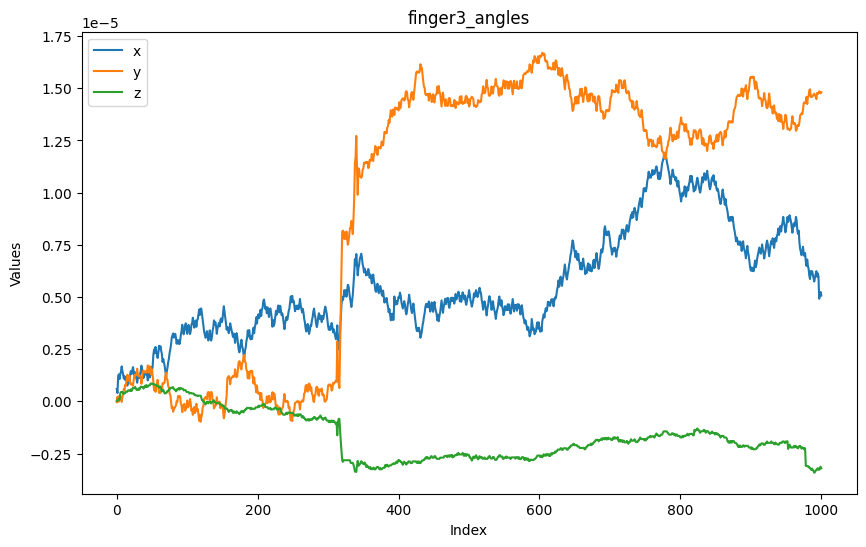

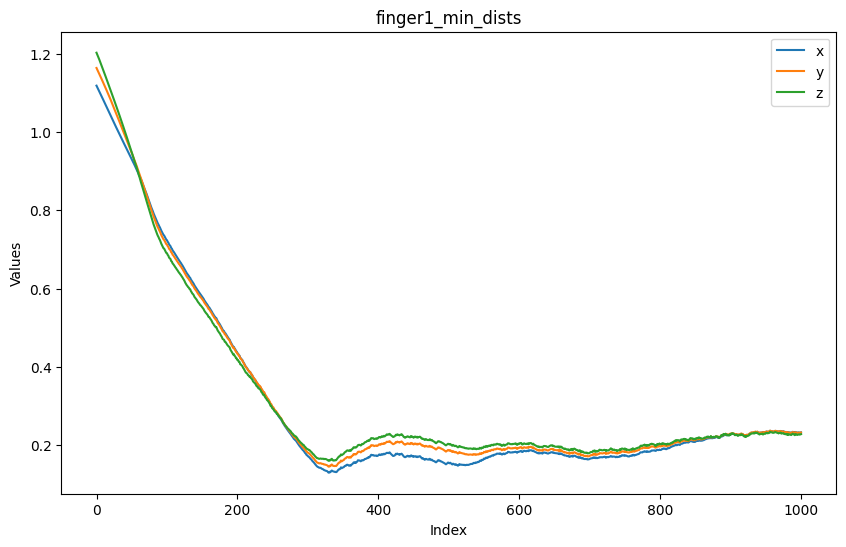

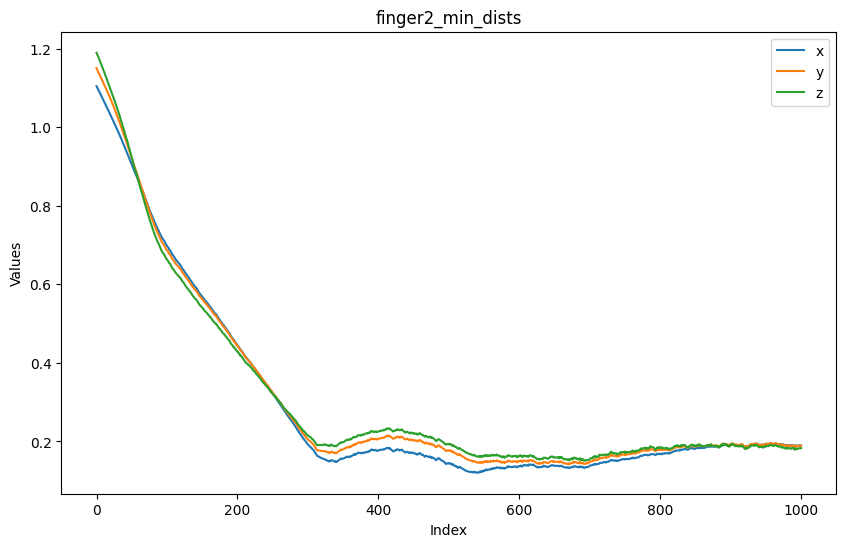

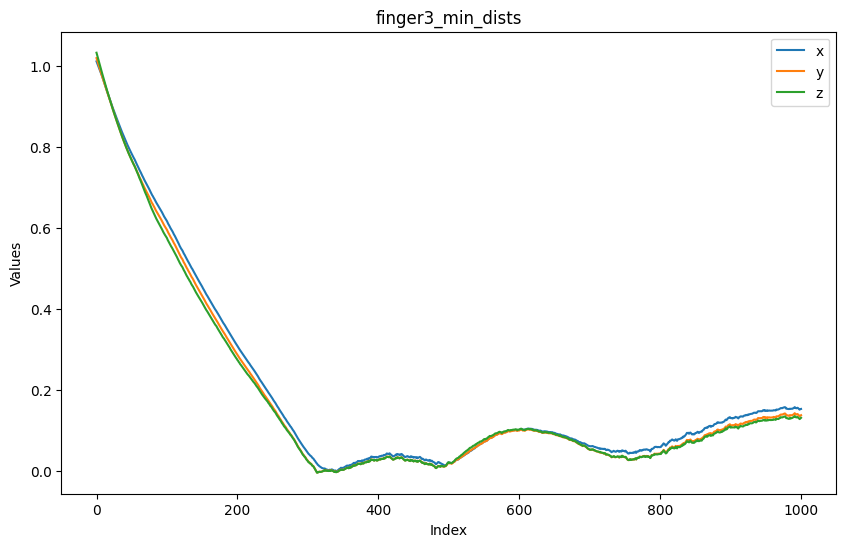

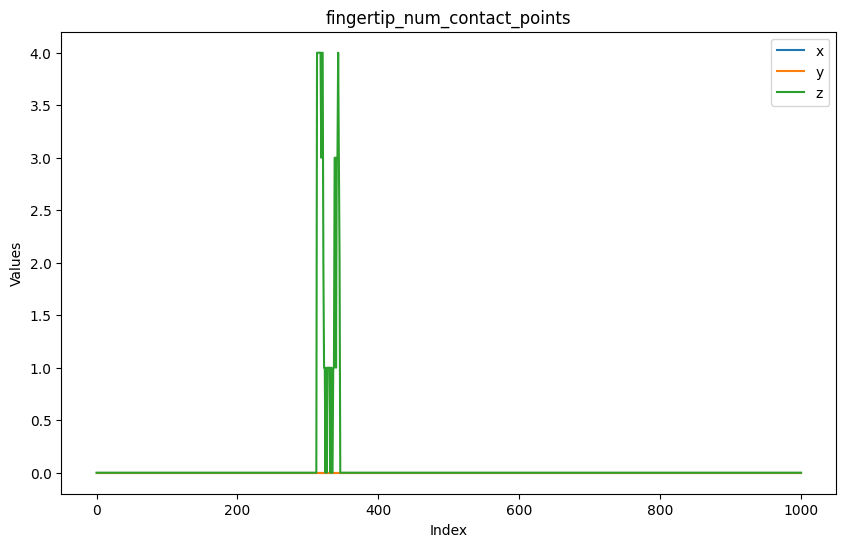

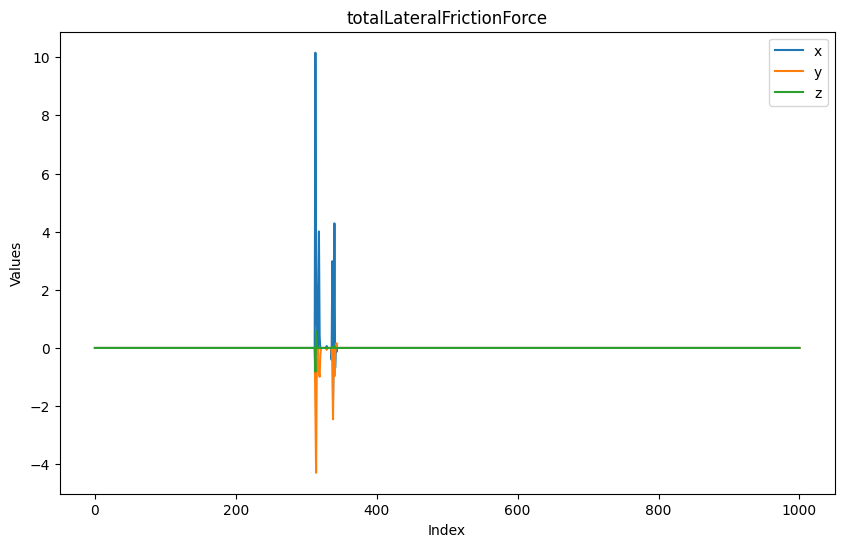

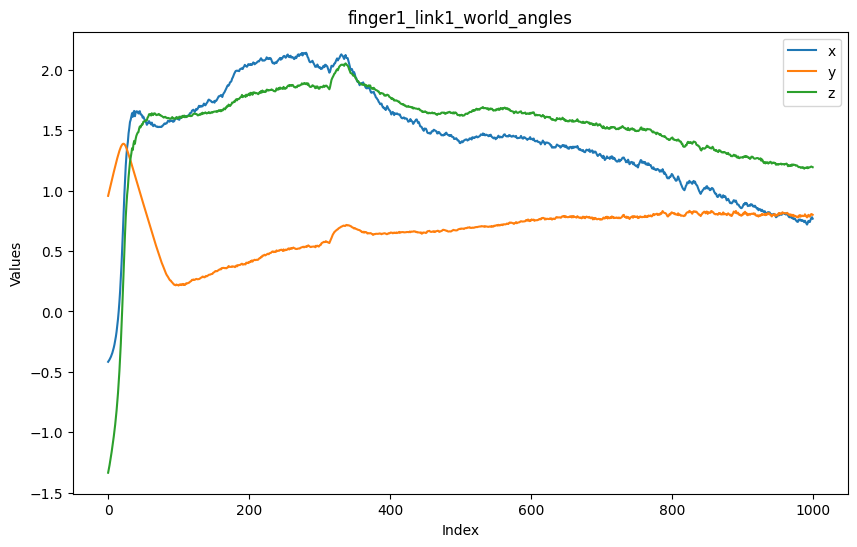

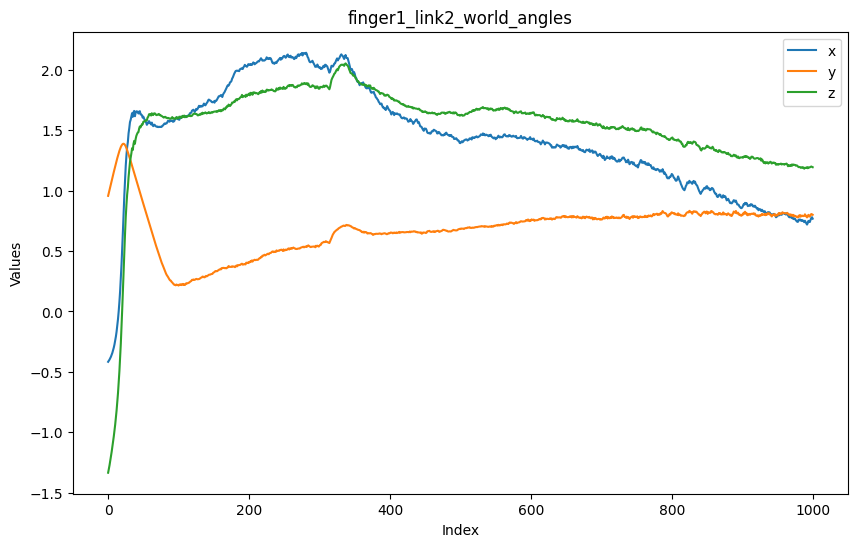

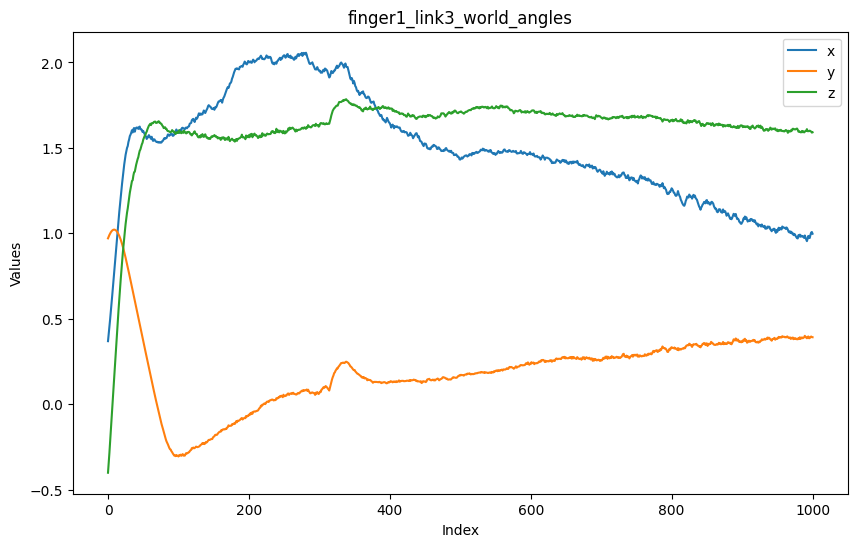

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Function to check if a column contains array-like data
def is_array_column(col):
    return isinstance(col.iloc[0], str) and col.iloc[0].startswith('[') and col.iloc[0].endswith(']')

# Function to convert string representation of arrays to actual arrays
def convert_to_array(col):
    return col.apply(lambda x: [float(num) for num in x.strip('[]').split()])

# Load the data from the CSV file
file_path = 'output_data.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Plotting each column with array-like data
for col_name in data.columns:
    if is_array_column(data[col_name]):
        # Convert the string representation to arrays
        array_data = convert_to_array(data[col_name])
        
        # Create a separate plot for each direction (x, y, z)
        plt.figure(figsize=(10, 6))
        for i, direction in enumerate(['x', 'y', 'z']):
            plt.plot(array_data.apply(lambda x: x[i]), label=f'{direction}')

        plt.title(f'{col_name}')
        plt.xlabel('Index')
        plt.ylabel('Values')
        plt.legend()
        plt.show()

Text(0.5, 0, 'timestep')

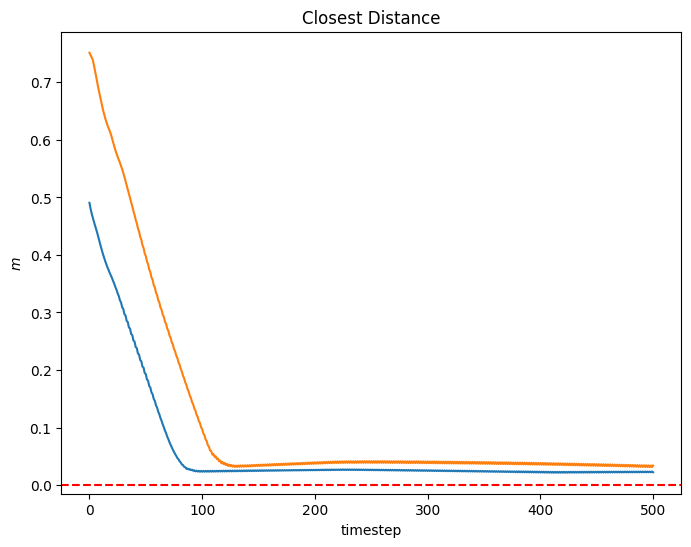

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import sys

# Read data
header = pd.read_csv('Screenshots/output_data11.csv', nrows=0).columns.tolist()
db = pd.read_csv('Screenshots/output_data10.csv',header=0)
db2 = pd.read_csv('Screenshots/output_data13.csv',header=0)
db.columns = header


plt.figure(figsize=(8,6))
plt.plot(db["closest distance"])
plt.plot(db2["closest distance"])
# plot a line at 0.0m
plt.axhline(y=0.0, color='r', linestyle='--')
plt.title('Closest Distance')
plt.ylabel('$m$')
plt.xlabel('timestep')